# **Plant_Leaf_Disease_Detection_Model**

## **1-Creating helper function**


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-25 09:01:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-25 09:01:54 (67.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **2-Load Helping Function**

In [ ]:
# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## **3-Mount Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **4-Split Folders**

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

## **4-Load Dataset From Google Drive**

In [ ]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Plant_leaf_diseases_dataset_with_augmentation.zip")
zip_ref.extractall()
zip_ref.close()

## **5- List All DataSet**

In [ ]:
# get the class names prgrammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Plant_leave_diseases_dataset_with_augmentation")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tom

## **6- Visualizing The Images**

In [ ]:
# let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # this line means randomly sample one item form the target folder
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show thw shape of the image

  return img 


## **7-Showing One Random Image**

['image (712).JPG']
Image shape: (256, 256, 3)


array([[[156, 141, 146],
        [141, 126, 131],
        [187, 172, 177],
        ...,
        [156, 143, 152],
        [150, 137, 146],
        [156, 143, 152]],

       [[137, 122, 127],
        [183, 168, 173],
        [162, 147, 152],
        ...,
        [188, 175, 184],
        [177, 164, 173],
        [151, 138, 147]],

       [[148, 133, 138],
        [168, 153, 158],
        [151, 136, 141],
        ...,
        [149, 136, 145],
        [166, 153, 162],
        [191, 178, 187]],

       ...,

       [[191, 176, 179],
        [147, 132, 135],
        [135, 120, 123],
        ...,
        [172, 158, 155],
        [171, 156, 159],
        [168, 153, 158]],

       [[153, 138, 141],
        [202, 187, 190],
        [169, 154, 157],
        ...,
        [166, 151, 146],
        [166, 150, 153],
        [169, 152, 160]],

       [[141, 126, 129],
        [144, 129, 132],
        [168, 153, 156],
        ...,
        [168, 153, 148],
        [169, 153, 156],
        [176, 159, 167]]

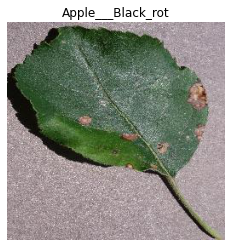

In [ ]:
view_random_image(target_dir="/content/Plant_leave_diseases_dataset_with_augmentation/",
                  target_class="Apple___Black_rot")

## **8-Split Dataset into Train , Test & Validation Directory**

In [ ]:
splitfolders.ratio("/content/Plant_leave_diseases_dataset_with_augmentation/", output="output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 61486 files [00:14, 4384.06 files/s]


## **9-Train, Test and Validation Directories**

In [ ]:
train_dir = '/content/output/train/'
test_dir = '/content/output/test/'
val_dir =  '/content/output/val/'

In [ ]:
# How many images/classes are there?
walk_through_dir("/content/output")

There are 3 directories and 0 images in '/content/output'.
There are 39 directories and 0 images in '/content/output/test'.
There are 0 directories and 118 images in '/content/output/test/Grape___Black_rot'.
There are 0 directories and 100 images in '/content/output/test/Apple___Black_rot'.
There are 0 directories and 151 images in '/content/output/test/Blueberry___healthy'.
There are 0 directories and 109 images in '/content/output/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
There are 0 directories and 552 images in '/content/output/test/Orange___Haunglongbing_(Citrus_greening)'.
There are 0 directories and 178 images in '/content/output/test/Tomato___Septoria_leaf_spot'.
There are 0 directories and 100 images in '/content/output/test/Cherry___healthy'.
There are 0 directories and 169 images in '/content/output/test/Tomato___Spider_mites Two-spotted_spider_mite'.
There are 0 directories and 100 images in '/content/output/test/Corn___Cercospora_leaf_spot Gray_leaf_spot'.
There ar

## **10- Preprocessing Train and Test Data**

In [ ]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (256, 256)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 shuffle=False) 

Found 49179 files belonging to 39 classes.
Found 6168 files belonging to 39 classes.


## **11- Create Model Checkpoint**

In [ ]:
# Create a checkpoint callback
checkpoint_path = "plant_village_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         montior="val_accuracy",
                                                         save_best_only=True)

## **12- Data Augmentation**

In [ ]:
# Create a data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2),
  # preprocessing.Rescaling(1/255.)  # rescale inputs of images between 1 & 0, required for models like ResNet50                            
], name= "data_augmentation")



## **13- Create Model (Use EfficientNetV2B0)**

In [ ]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(256, 256, 3), name="input_layer")
x = data_augmentation(inputs) # augment layers (only happens during trainable phase)
x = base_model(x, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model=tf.keras.Model(inputs, outputs)

24289280/24274472 [==============================] - 1s 0us/step


In [ ]:
# Get a summary of model we've been created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 256, 256, 3)      0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 39)                49959     
                                                             

## **14-Compiling and Fitting The Model**

In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
1537/1537 [==============================] - 668s 423ms/step - loss: 0.5821 - accuracy: 0.8722 - val_loss: 0.1816 - val_accuracy: 0.9665
Epoch 2/5
1537/1537 [==============================] - 421s 273ms/step - loss: 0.1947 - accuracy: 0.9520 - val_loss: 0.1130 - val_accuracy: 0.9721
Epoch 3/5
1537/1537 [==============================] - 355s 231ms/step - loss: 0.1412 - accuracy: 0.9634 - val_loss: 0.0905 - val_accuracy: 0.9754
Epoch 4/5
1537/1537 [==============================] - 328s 213ms/step - loss: 0.1166 - accuracy: 0.9672 - val_loss: 0.1030 - val_accuracy: 0.9688
Epoch 5/5
1537/1537 [==============================] - 305s 199ms/step - loss: 0.0994 - accuracy: 0.9719 - val_loss: 0.0599 - val_accuracy: 0.9833


## **15- Evaluating The Model**

In [ ]:
# Evaluate on the whole test dataset  
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

193/193 [==============================] - 27s 138ms/step - loss: 0.1273 - accuracy: 0.9593


[0.1273057609796524, 0.9593061208724976]

## **16-Plot The Graph**

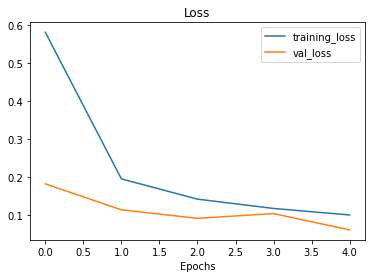

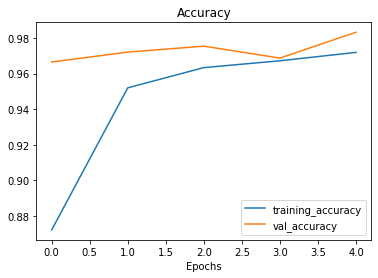

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

## **17- Unfreeze Some Layers**

In [ ]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

## **18-Recompile The Model**

In [ ]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b0 True
global_avg_pooling_layer True
output_layer True


In [ ]:
# Check which layers in our model is trainable
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number, layer.name, layer.trainable )

0 random_flip True
1 random_rotation True
2 random_height True
3 random_width True
4 random_zoom True


## **19-Fine Tune The Model**

In [ ]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
1537/1537 [==============================] - 307s 194ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.0428 - val_accuracy: 0.9855
Epoch 6/10
1537/1537 [==============================] - 289s 188ms/step - loss: 0.0655 - accuracy: 0.9788 - val_loss: 0.0325 - val_accuracy: 0.9911
Epoch 7/10
1537/1537 [==============================] - 283s 184ms/step - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0397 - val_accuracy: 0.9866
Epoch 8/10
1537/1537 [==============================] - 281s 183ms/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 9/10
1537/1537 [==============================] - 277s 180ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.0255 - val_accuracy: 0.9933
Epoch 10/10
1537/1537 [==============================] - 276s 179ms/step - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.0268 - val_accuracy: 0.9911


## **20-Evaluate On Whole Dataset**

In [ ]:
# Evaluate on the whole test dataset
fine_tune_results =model.evaluate(test_data)
fine_tune_results

193/193 [==============================] - 26s 134ms/step - loss: 0.0841 - accuracy: 0.9710


[0.08411246538162231, 0.9709792733192444]

## **21- Compare Feature Extraction and Fine Tuning Graphs**

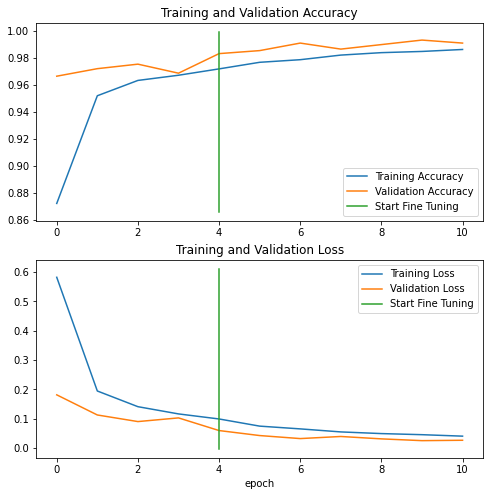

In [ ]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

## **22-Saving and loading our model**


In [ ]:
# Save our fine-tuning model
model.save("/content/drive/MyDrive/Plant_Leaf_Disease_Detection_Model.h5")

In [ ]:
# Load and evaluate saved model
loaded_model =tf.keras.models.load_model("/content/drive/MyDrive/Plant_Leaf_Disease_Detection_Model.h5")

In [ ]:
# Evaluate loaded model and compare performance to pre-saved model
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

193/193 [==============================] - 30s 137ms/step - loss: 0.0329 - accuracy: 0.9888


[0.03294507786631584, 0.9888132214546204]

In [ ]:
# The results from the saved model (Above) should be very similar to the results below
fine_tune_results

[0.03294507786631584, 0.9888132214546204]

## **23- Making predictions with our trained model**

In [ ]:
# Make predictions with model
preds_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it left

193/193 [==============================] - 25s 123ms/step


In [ ]:
len(test_data)

193

In [ ]:
# How many predictions are there?
len(preds_probs)

6168

In [ ]:
# What's the shape of our predictions?
preds_probs.shape

(6168, 39)

In [ ]:
# Let's see whats the first 10 predictions looks like
preds_probs[:10]

array([[9.99033451e-01, 9.24557680e-04, 7.67214317e-07, 8.58353542e-06,
        4.14530823e-13, 5.54801705e-10, 9.86973919e-06, 1.13801709e-12,
        3.75893400e-10, 1.86021025e-11, 1.76878720e-10, 1.72603923e-12,
        1.70952731e-11, 5.54149955e-11, 1.49587233e-12, 3.49296568e-12,
        6.87098711e-10, 9.39445636e-06, 4.76340800e-10, 1.27280073e-05,
        1.43441908e-11, 1.19942120e-11, 4.27540003e-10, 1.49581879e-15,
        6.00684162e-13, 1.01813807e-10, 1.07734417e-08, 7.95286059e-12,
        9.30994837e-10, 3.08263723e-12, 3.04164000e-10, 5.62374902e-09,
        4.57625847e-11, 2.15687870e-10, 3.00781566e-10, 7.05471052e-07,
        2.72212791e-14, 2.81587687e-13, 4.82664611e-08],
       [9.32386339e-01, 2.01349977e-07, 3.23586911e-02, 3.52441594e-02,
        2.88442176e-13, 7.74389264e-08, 6.39191766e-09, 3.08591069e-07,
        1.27093301e-11, 5.78075118e-14, 1.33048988e-10, 6.42381317e-14,
        1.65031963e-06, 5.63173366e-08, 1.65655990e-07, 2.72477827e-08,
       

In [ ]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([9.9903345e-01, 9.2455768e-04, 7.6721432e-07, 8.5835354e-06,
        4.1453082e-13, 5.5480170e-10, 9.8697392e-06, 1.1380171e-12,
        3.7589340e-10, 1.8602102e-11, 1.7687872e-10, 1.7260392e-12,
        1.7095273e-11, 5.5414996e-11, 1.4958723e-12, 3.4929657e-12,
        6.8709871e-10, 9.3944564e-06, 4.7634080e-10, 1.2728007e-05,
        1.4344191e-11, 1.1994212e-11, 4.2754000e-10, 1.4958188e-15,
        6.0068416e-13, 1.0181381e-10, 1.0773442e-08, 7.9528606e-12,
        9.3099484e-10, 3.0826372e-12, 3.0416400e-10, 5.6237490e-09,
        4.5762585e-11, 2.1568787e-10, 3.0078157e-10, 7.0547105e-07,
        2.7221279e-14, 2.8158769e-13, 4.8266461e-08], dtype=float32),
 39,
 1.0000001265832699)

In [ ]:
# We get one prediction probability per class(in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilites for sample 0: {len(preds_probs[0])}")
print(f"What prediction probabilites sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")


Number of prediction probabilites for sample 0: 39
What prediction probabilites sample 0 looks like:
 [9.9903345e-01 9.2455768e-04 7.6721432e-07 8.5835354e-06 4.1453082e-13
 5.5480170e-10 9.8697392e-06 1.1380171e-12 3.7589340e-10 1.8602102e-11
 1.7687872e-10 1.7260392e-12 1.7095273e-11 5.5414996e-11 1.4958723e-12
 3.4929657e-12 6.8709871e-10 9.3944564e-06 4.7634080e-10 1.2728007e-05
 1.4344191e-11 1.1994212e-11 4.2754000e-10 1.4958188e-15 6.0068416e-13
 1.0181381e-10 1.0773442e-08 7.9528606e-12 9.3099484e-10 3.0826372e-12
 3.0416400e-10 5.6237490e-09 4.5762585e-11 2.1568787e-10 3.0078157e-10
 7.0547105e-07 2.7221279e-14 2.8158769e-13 4.8266461e-08]
The class with highest predicted probability by the model for sample 0: 0


In [ ]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# How many pred classes we have?
len(pred_classes)

6168

Now we've got a predictions array of our all model's predictions, to evaluate them, we need to compare them to the original test dataset labels. 

In [ ]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# How many y_labels are there?
len(y_labels)

6168

In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [ ]:
len(test_data)

193

## **24 - Let's get visual:making a confusion matrix**

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust']

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

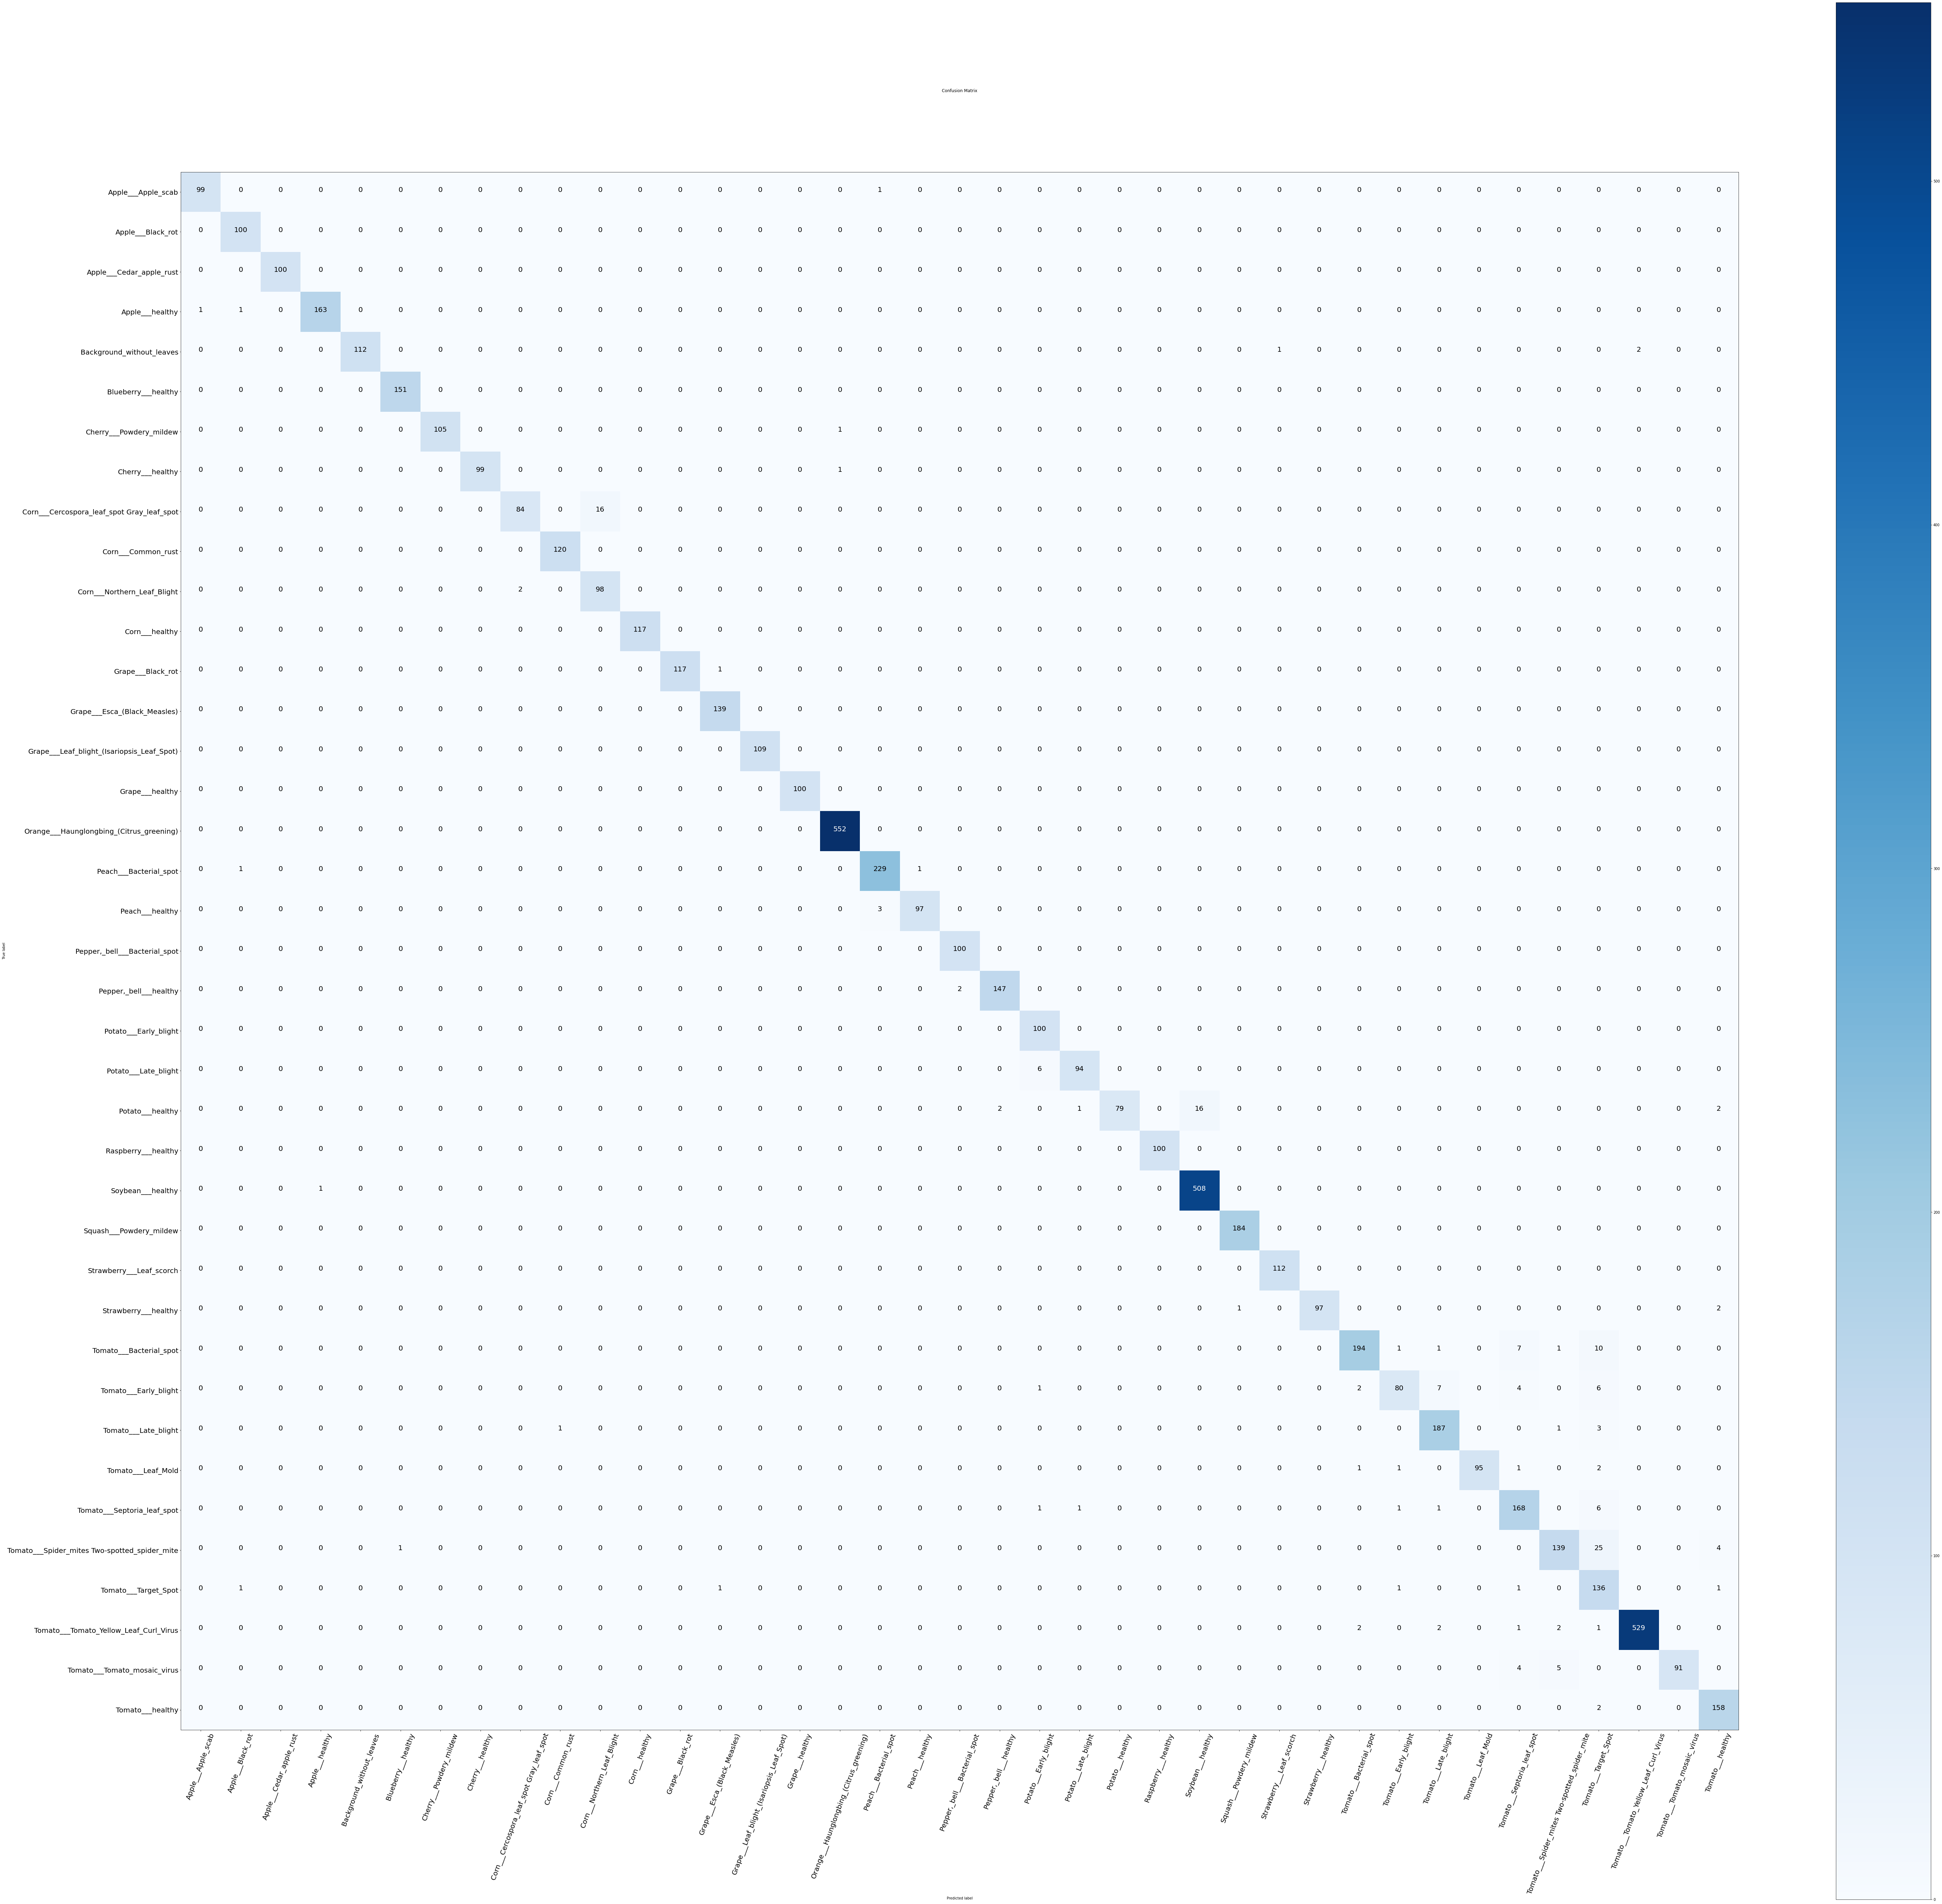

In [ ]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      savefig=True)

##**25-Let's keep the evaluation train going, time for a classification report**



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.97      1.00      0.99       100
           2       1.00      1.00      1.00       100
           3       0.99      0.99      0.99       165
           4       1.00      0.97      0.99       115
           5       0.99      1.00      1.00       151
           6       1.00      0.99      1.00       106
           7       1.00      0.99      0.99       100
           8       0.98      0.84      0.90       100
           9       0.99      1.00      1.00       120
          10       0.86      0.98      0.92       100
          11       1.00      1.00      1.00       117
          12       1.00      0.99      1.00       118
          13       0.99      1.00      0.99       139
          14       1.00      1.00      1.00       109
          15       1.00      1.00      1.00       100
          16       1.00      1.00      1.00       552
          17       0.98    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.99, 'precision': 0.99, 'recall': 0.99, 'support': 100},
 '1': {'f1-score': 0.9852216748768473,
  'precision': 0.970873786407767,
  'recall': 1.0,
  'support': 100},
 '10': {'f1-score': 0.9158878504672898,
  'precision': 0.8596491228070176,
  'recall': 0.98,
  'support': 100},
 '11': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 117},
 '12': {'f1-score': 0.9957446808510638,
  'precision': 1.0,
  'recall': 0.9915254237288136,
  'support': 118},
 '13': {'f1-score': 0.9928571428571429,
  'precision': 0.9858156028368794,
  'recall': 1.0,
  'support': 139},
 '14': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 109},
 '15': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 100},
 '16': {'f1-score': 0.9981916817359855,
  'precision': 0.9963898916967509,
  'recall': 1.0,
  'support': 552},
 '17': {'f1-score': 0.9870689655172413,
  'precision': 0.9828326180257511,
  'recall': 0.9913419913419913,
  'support': 231},
 '18': {'f1-score'

Let's plot all of our classes F1-scores...

In [ ]:
class_names[38]

'Tomato___healthy'

In [ ]:
classification_report_dict["38"]["f1-score"]

0.9663608562691132

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'Apple___Apple_scab': 0.99,
 'Apple___Black_rot': 0.9852216748768473,
 'Apple___Cedar_apple_rust': 1.0,
 'Apple___healthy': 0.9908814589665653,
 'Background_without_leaves': 0.986784140969163,
 'Blueberry___healthy': 0.9966996699669968,
 'Cherry___Powdery_mildew': 0.9952606635071091,
 'Cherry___healthy': 0.9949748743718593,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 0.9032258064516129,
 'Corn___Common_rust': 0.995850622406639,
 'Corn___Northern_Leaf_Blight': 0.9158878504672898,
 'Corn___healthy': 1.0,
 'Grape___Black_rot': 0.9957446808510638,
 'Grape___Esca_(Black_Measles)': 0.9928571428571429,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1.0,
 'Grape___healthy': 1.0,
 'Orange___Haunglongbing_(Citrus_greening)': 0.9981916817359855,
 'Peach___Bacterial_spot': 0.9870689655172413,
 'Peach___healthy': 0.9797979797979798,
 'Pepper,_bell___Bacterial_spot': 0.99009900990099,
 'Pepper,_bell___healthy': 0.9865771812080537,
 'Potato___Early_blight': 0.9615384615384615,
 'Potato___Late_bli

## **26- Turning F1-Score into DataFrame Visualization**

In [ ]:

import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
2,Apple___Cedar_apple_rust,1.000000
15,Grape___healthy,1.000000
14,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1.000000
11,Corn___healthy,1.000000
24,Raspberry___healthy,1.000000
16,Orange___Haunglongbing_(Citrus_greening),0.998192
26,Squash___Powdery_mildew,0.997290
5,Blueberry___healthy,0.996700
9,Corn___Common_rust,0.995851
12,Grape___Black_rot,0.995745


In [ ]:
f1_scores[:10]

,class_names,f1-score
2,Apple___Cedar_apple_rust,1.000000
15,Grape___healthy,1.000000
14,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1.000000
11,Corn___healthy,1.000000
24,Raspberry___healthy,1.000000
16,Orange___Haunglongbing_(Citrus_greening),0.998192
26,Squash___Powdery_mildew,0.997290
5,Blueberry___healthy,0.996700
9,Corn___Common_rust,0.995851
12,Grape___Black_rot,0.995745


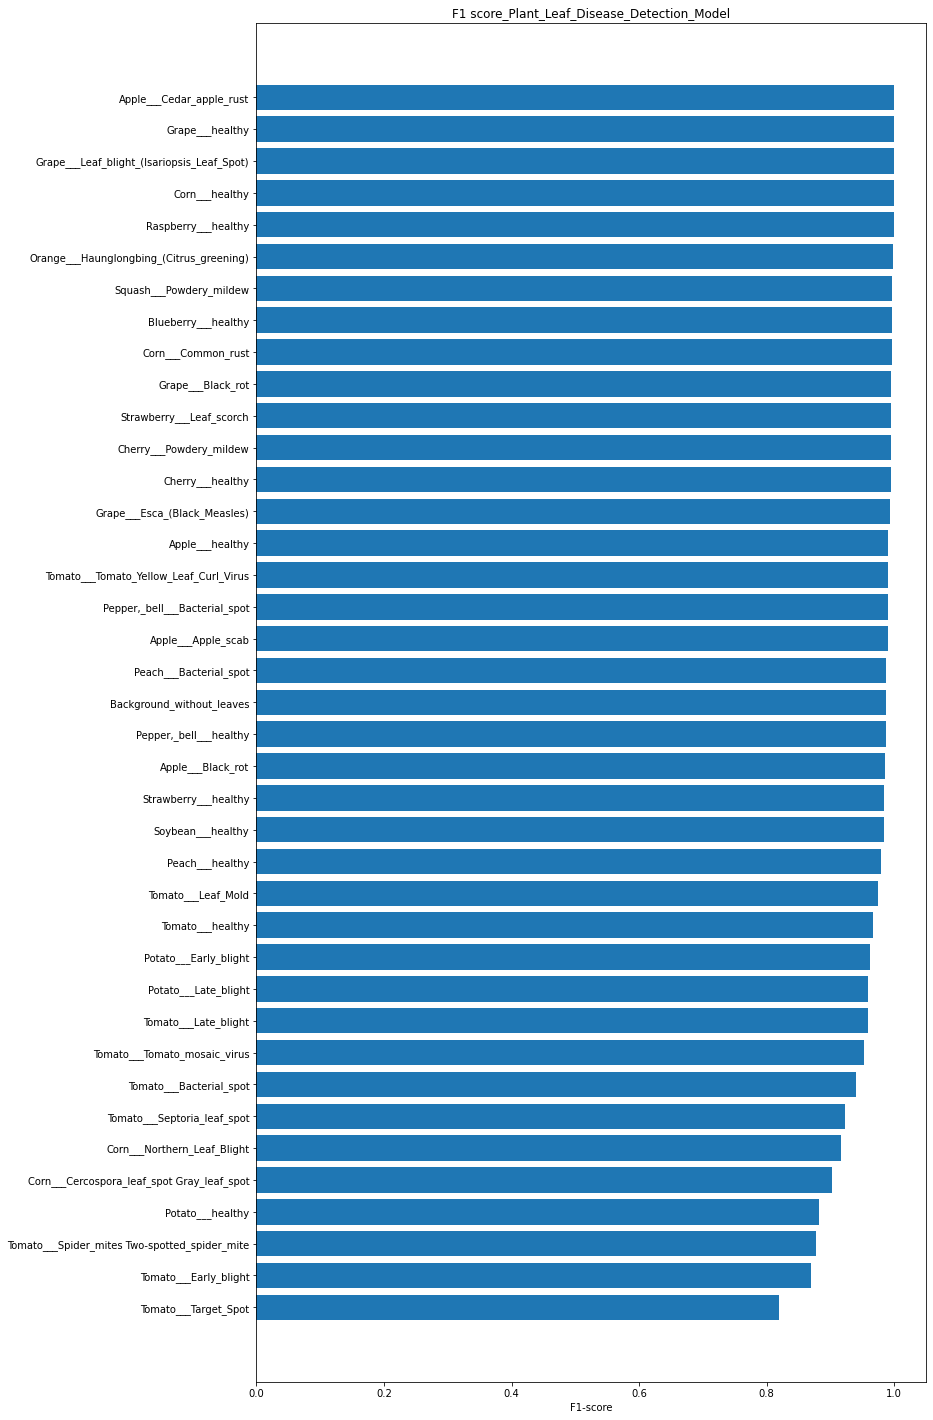

In [ ]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score_Plant_Leaf_Disease_Detection_Model")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

**Exercise:** Try visualizing some of the most poorly predicted classes (e.g. `apple_pie`, `pork_chip`), do you notice any trends among them? Why might our model be having trouble with them.

## **26-Visualizing predictions on cutom images**

In [ ]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=256, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


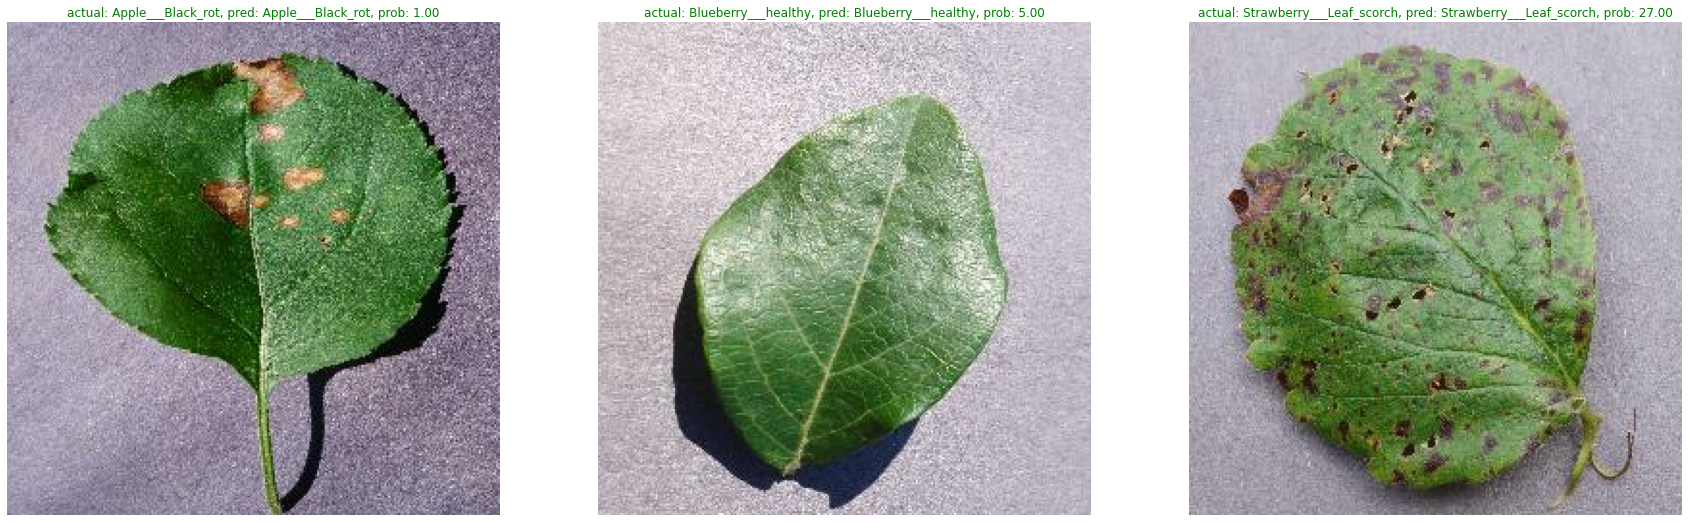

In [ ]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(30,30))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

## **30-Test out the big model on our own custom images**

In [ ]:
img='/content/output/val/Peach___healthy/image (120).JPG'

(-0.5, 255.5, 255.5, -0.5)

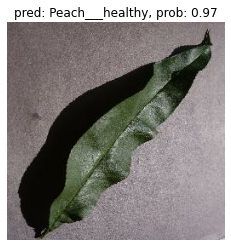

In [ ]:
# Make prediction on and plot the custom food images

img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetB0 model
pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
# plot the appropriate information
plt.figure()
plt.imshow(img/255.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)